In [98]:
%matplotlib inline
import pandas as pd
import re
import seaborn as sns
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

df = pd.read_csv("../data/cleaned/cleaned_jobs.csv")

# Feature engineering
yearly_salaries = df[df['salary_avg'] >= 10000]['salary_avg'].dropna()
hourly_salaries = df[df['salary_avg'] < 200]['salary_avg'].dropna()

filtered = df[['salary_avg', 'commute_time']].copy()
filtered['salary_avg'] = pd.to_numeric(filtered['salary_avg'], errors='coerce')
filtered['commute_time'] = pd.to_numeric(filtered['commute_time'], errors='coerce')
filtered = filtered.dropna()


In [69]:
df.shape

(61953, 31)

In [70]:
df.head(30)

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,has_pay_range,state,state_clean,desc_wordcount
0,0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,101000.00,143000.00,NaN,122000.0,122000.0,"['tableau', 'r', 'python', 'sql']",False,NaN,NaN,448
1,1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,[],False,NaN,NaN,204
2,2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,...,NaN,NaN,NaN,NaN,NaN,['sql'],False,KS,KS,556
3,3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,...,15.00,25.00,20.000,NaN,41600.0,"['powerpoint', 'excel', 'power_bi']",False,NaN,NaN,113
4,4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,90000.00,110000.00,NaN,100000.0,100000.0,"['powerpoint', 'excel', 'outlook', 'word']",False,NaN,NaN,790
5,5,5,Data Analyst,Flint Hills Resources,"Wichita, KS",via Jora,Your Job\n\nFlint Hills Resources is seeking a...,"['20 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,"['power_bi', 'aws', 'excel', 'sql', 'mysql', '...",False,KS,KS,832
6,6,6,Data Analyst (Model Validation),Swedbank,Anywhere,via JobTeaser,"Are you passionate about Credit Risk, Data Ana...","['17 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgKE1vZGVsIF...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,"['python', 'sas', 'sql', 'spss']",False,NaN,NaN,358
7,7,7,Data Analyst,AEG,United States,via IT Job Depot,"In order to be considered for this role, after...","['8 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,"['power_bi', 'tableau', 'jira', 'snowflake', '...",False,NaN,NaN,957
8,8,8,IT Financial Data Analyst Lead,Progressive,Anywhere,via Jobgether,"This a Full Remote job, the offer is available...","['7 hours ago', 'Work from home', 'Full-time',...",eyJqb2JfdGl0bGUiOiJJVCBGaW5hbmNpYWwgRGF0YSBBbm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,[],True,NaN,NaN,408
9,9,9,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,"['r', 'python']",True,OK,OK,881


In [71]:
# Check for missing or repeat values

df.isnull().sum()

Unnamed: 0                 0
index                      0
title                      0
company_name               0
location                  37
via                        9
description                0
extensions                 0
job_id                     0
thumbnail              23759
posted_at                190
schedule_type            246
work_from_home         33973
salary                 51865
search_term                0
date_time                  0
search_location            0
commute_time           61953
salary_pay             51865
salary_rate            51865
salary_avg             51865
salary_min             52441
salary_max             52441
salary_hourly          56053
salary_yearly          57884
salary_standardized    51865
description_tokens         0
has_pay_range              0
state                  44010
state_clean            28548
desc_wordcount             0
dtype: int64

In [72]:
df.duplicated().sum()

0

In [73]:
df['job_id'].duplicated().sum()

3178

In [74]:
df.dtypes

Unnamed: 0               int64
index                    int64
title                   object
company_name            object
location                object
via                     object
description             object
extensions              object
job_id                  object
thumbnail               object
posted_at               object
schedule_type           object
work_from_home          object
salary                  object
search_term             object
date_time               object
search_location         object
commute_time           float64
salary_pay              object
salary_rate             object
salary_avg             float64
salary_min             float64
salary_max             float64
salary_hourly          float64
salary_yearly          float64
salary_standardized    float64
description_tokens      object
has_pay_range             bool
state                   object
state_clean             object
desc_wordcount           int64
dtype: object

In [75]:
# Check % of missing values in each column
missing_values_percentage.sort_values(ascending=False)


commute_time           100.000000
salary_yearly           93.432118
salary_hourly           90.476652
salary_max              84.646426
salary_min              84.646426
salary                  83.716688
salary_standardized     83.716688
salary_avg              83.716688
salary_rate             83.716688
salary_pay              83.716688
work_from_home          54.836731
thumbnail               38.350040
schedule_type            0.397075
posted_at                0.306684
location                 0.059723
via                      0.014527
Unnamed: 0               0.000000
search_location          0.000000
date_time                0.000000
search_term              0.000000
index                    0.000000
job_id                   0.000000
extensions               0.000000
description              0.000000
company_name             0.000000
title                    0.000000
description_tokens       0.000000
dtype: float64

In [76]:
# Basic stats for the salary columns
salary_stats = df[['salary_avg', 'salary_min', 'salary_max']].describe()
salary_stats

,salary_avg,salary_min,salary_max
count,10088.000000,9512.000000,9512.000000
mean,42100.231239,34846.281874,50487.856787
std,55893.993519,45843.034891,67366.522273
min,7.250000,8.000000,10.000000
25%,31.500000,19.520000,45.000000
50%,60.000000,50.000000,75.000000
75%,92500.000000,77000.000000,110000.000000
max,550000.000000,450000.000000,850000.000000


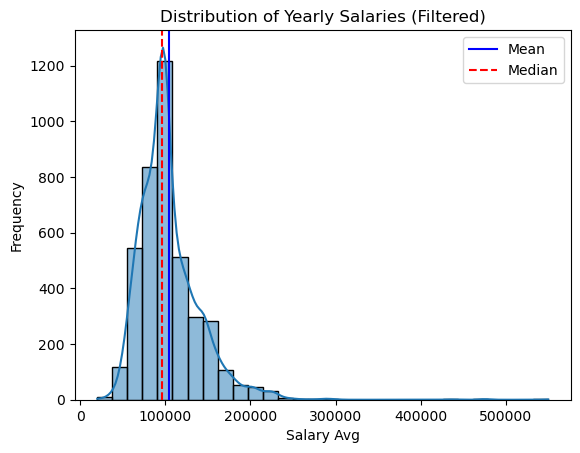

In [77]:
# Plot distribution of yearly salaries
sns.histplot(yearly_salaries, kde=True, bins=30)
plt.axvline(yearly_salaries.mean(), color="blue", linestyle="solid", label="Mean")
plt.axvline(yearly_salaries.median(), color="red", linestyle="dashed", label="Median")
plt.title('Distribution of Yearly Salaries (Filtered)')
plt.xlabel('Salary Avg')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("../images/yearly_salary_distribution.png")
plt.show()

Some postings have extremely high salaries ($300k+), but most fall within the $50k–$150k range. The **mean** is greater than the **median**, confirming a positive skew — likely caused by a few very high-paying jobs pulling the average up. The most common salary range appears to be $80k–$180k.

The right tail includes salaries above $200k, with some exceeding $500k. It will be interesting to investigate these outliers to determine whether they are:
- legitimate high-paying roles,
- the result of incorrect data entry,
- misclassified hourly rates as yearly salaries, or
- possibly fraudulent.

In [78]:
print("Mean:", yearly_salaries.mean())
print("Median:", yearly_salaries.median())
print("Std Dev:", yearly_salaries.std())

Mean: 104074.08251903711
Median: 96500.0
Std Dev: 36063.74905303827


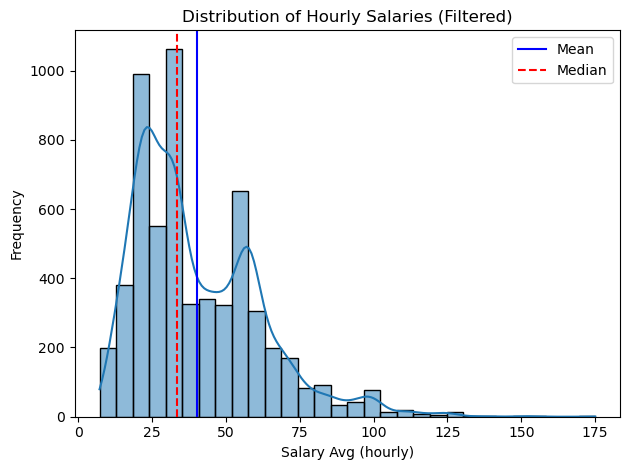

In [79]:
# Plot the result
sns.histplot(hourly_salaries, kde=True, bins=30)
plt.axvline(hourly_salaries.mean(), color="blue", linestyle="solid", label="Mean")
plt.axvline(hourly_salaries.median(), color="red", linestyle="dashed", label="Median")
plt.title('Distribution of Hourly Salaries (Filtered)')
plt.xlabel('Salary Avg (hourly)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig("../images/hourly_salary_distribution.png")
plt.show()


Similar to yearly salaries, hourly wages are **positively skewed**, with most jobs offering between **$15 and $50 per hour**. Higher-paying roles are less common but present. The KDE curve reveals **multiple peaks**, suggesting a **multimodal distribution** that may reflect different job types — such as entry-level positions, mid-level analysts, and contractors.

Distinct clusters appear around **$20**, **$35**, and **$50 per hour**, indicating potential segmentation in the job market.  
As a next step, it will be important to investigate **outliers above $100/hour** to determine whether they represent:
- legitimate high-paying opportunities,
- data entry errors (e.g., misclassified yearly salaries), or
- potentially fraudulent listings.

In [80]:
print(df['has_pay_range'].value_counts())


has_pay_range
False    44319
True     17634
Name: count, dtype: int64


In [81]:
print(df['description'].head(10))


0    In the intersection of compliance and analytic...
1    Job Title: Entry Level Business Analyst / Prod...
2    Overview:\n\nWe are seeking a full-time...\nAe...
3    Enthusiastic Data Analyst for processing sales...
4    Overview of Position\n\nThis position will be ...
5    Your Job\n\nFlint Hills Resources is seeking a...
6    Are you passionate about Credit Risk, Data Ana...
7    In order to be considered for this role, after...
8    This a Full Remote job, the offer is available...
9    Job Summary: The Data Analyst oversees data pr...
Name: description, dtype: object


In [96]:
print(df['schedule_type'].unique())
print(df['schedule_type'].nunique())

['Full-time' 'Contractor' nan 'Part-time' 'Internship'
 'Full-time and Internship' 'Full-time and Part-time'
 'Full-time and Contractor' 'Full-time, Part-time, and Contractor'
 'Contractor and Temp work' 'Part-time, Contractor, and Temp work'
 'Full-time, Contractor, and Temp work' 'Full-time and Temp work'
 'Part-time and Internship' 'Temp work' 'Part-time and Temp work'
 'Full-time, Part-time, and Internship' 'Full-time and Per diem'
 'Temp work and Internship' 'Full-time, Temp work, and Internship'
 'Part-time and Contractor' 'Per diem' 'Volunteer'
 'Part-time, Temp work, and Internship' 'Contractor and Per diem'
 'Full-time, Part-time, and Per diem' 'Temp work and Per diem'
 'Full-time and Volunteer' 'Part-time and Full-time'
 'Full-time, Part-time, and Temp work' 'Part-time and Per diem'
 'Full-time, Temp work, and Per diem'
 'Contractor, Temp work, and Per diem']
32


In [82]:
df.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens',
       'has_pay_range', 'state', 'state_clean', 'desc_wordcount'],
      dtype='object')

Univariate Analysis

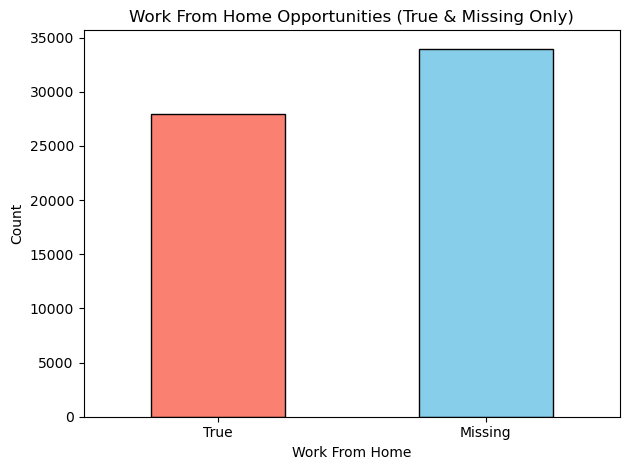

In [135]:
# 1A. Plot counts for work_from_home with NaNs included

# Get value counts including NaNs
value_counts = df['work_from_home'].value_counts(dropna=False)

# Keep only True and NaN (Missing)
filtered_counts = value_counts.loc[[True, np.nan]]

ax = filtered_counts.plot(kind='bar', color=['salmon', 'skyblue'], edgecolor='black')
ax.set_title('Work From Home Opportunities (True & Missing Only)')
ax.set_xlabel('Work From Home')
ax.set_ylabel('Count')

ax.set_xticks(range(len(filtered_counts)))

labels = []
for val in filtered_counts.index:
    if pd.isna(val):
        labels.append('Missing')
    else:
        labels.append(str(val))

ax.set_xticklabels(labels)
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig("../images/work_from_home_true_missing.png")
plt.show()


About 45.16% of the job listings offer work-from-home opportunities.

In [143]:
df.shape

(61953, 38)

In [126]:
print(df['work_from_home'].value_counts(dropna=False))


work_from_home
NaN     33973
True    27980
Name: count, dtype: int64


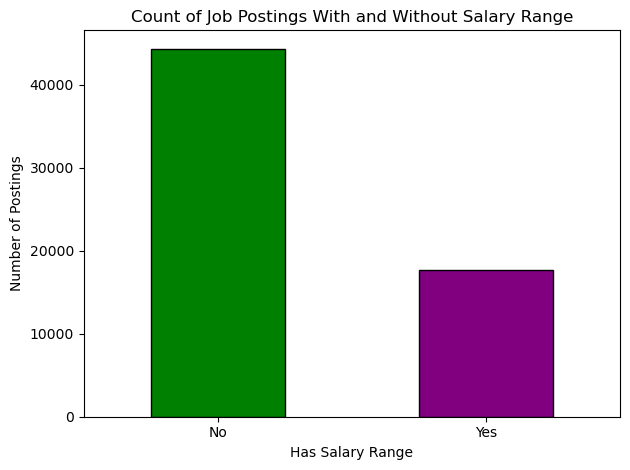

In [138]:
# 1B. Plot how many jobs include a salary range in their description
df['has_pay_range'].value_counts().plot(kind='bar', color=['green', 'purple'], edgecolor='black')
plt.title('Count of Job Postings With and Without Salary Range')
plt.xlabel('Has Salary Range')
plt.ylabel('Number of Postings')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.savefig("../images/has_salary_range_bar.png")  
plt.show()

About 28.46% of job postings include a salary range.

In [134]:
print(df['has_pay_range'].value_counts(dropna=False))

has_pay_range
False    44319
True     17634
Name: count, dtype: int64


Bivariate Analysis

In [139]:
print(df['commute_time'].value_counts(dropna=False))

commute_time
NaN    61953
Name: count, dtype: int64


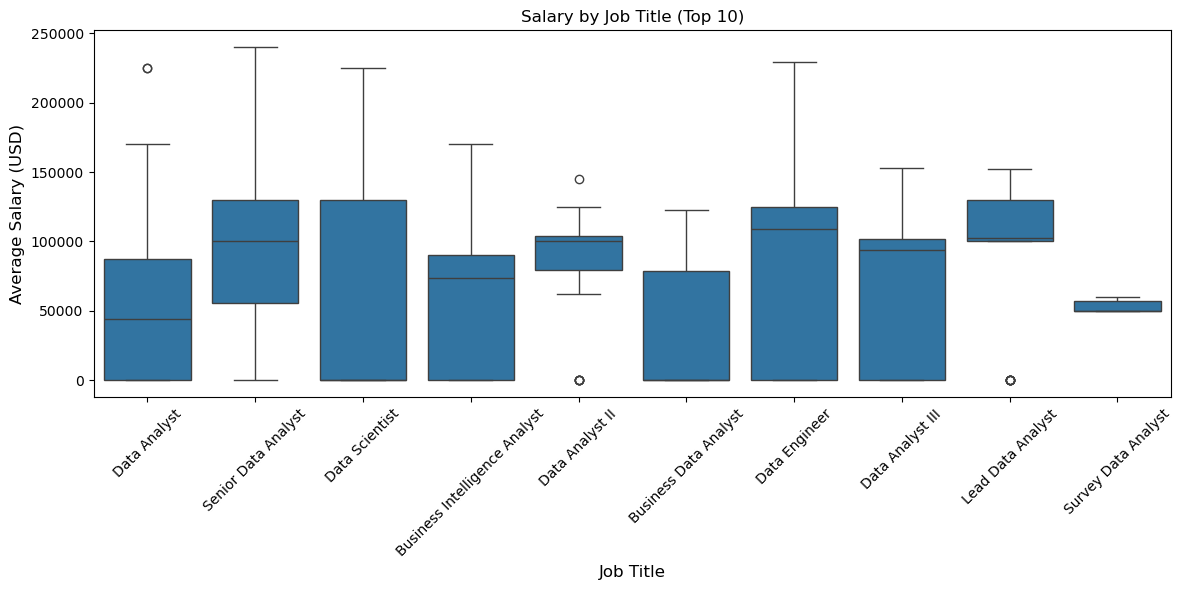

In [120]:
# 2A
# Get top 10 job titles
top_titles = df['title'].value_counts().head(10).index

# Subset dataframe to top titles only
subset = df[df['title'].isin(top_titles)]

plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x='title', y='salary_avg')
plt.xticks(rotation=45)
plt.title("Salary by Job Title (Top 10)")
plt.xlabel("Job Title", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.tight_layout()
plt.savefig("../images/salary_by_job_title_2A.jpg")
plt.show()

Average salary increases as seniority of a role increases.

<Figure size 1400x800 with 0 Axes>

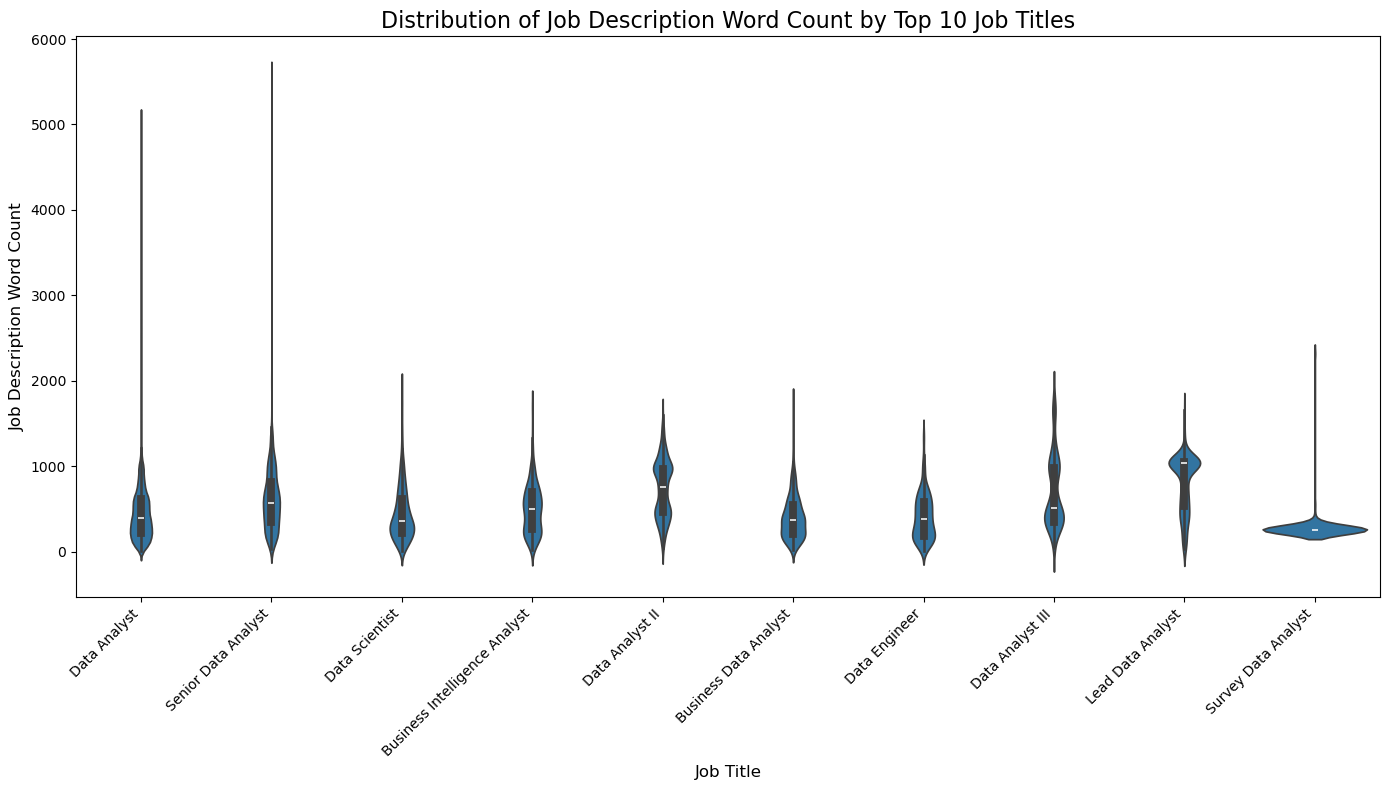

In [119]:
# 2B. Violion plot of desc_wordcount by top 10 job titles

# Get top 10 job titles
top_10_titles = df['title'].value_counts().nlargest(10).index

# Filter the DF
df_top_titles = df[df['title'].isin(top_10_titles)].copy()

plt.figure(figsize=(14,8))
sns.violinplot(data=df_top_titles, x='title', y='desc_wordcount')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel("Job Title", fontsize=12)
plt.ylabel("Job Description Word Count", fontsize=12)
plt.title("Distribution of Job Description Word Count by Top 10 Job Titles", fontsize=16)
plt.tight_layout()
plt.savefig("../images/desc_wordcount_top10_titles_2B.jpg")
plt.show()


Job descriptions can occasionally be very long (up to 5000+ words), but those are rare outliers. This is especially true for "Senior Data Analyst" and "Data Analyst" roles. Most descriptions seem to be within the 200 and 1000 words range. 

- More senior or general roles may require more responsibilities, hence the longer descriptions. 
- Specialized roles like "Survey Data Analyst" may have less variation in required skills, leading to shorter postings.
- Next step is to look into other reasons for high outliers.

Multivariate Anaysis

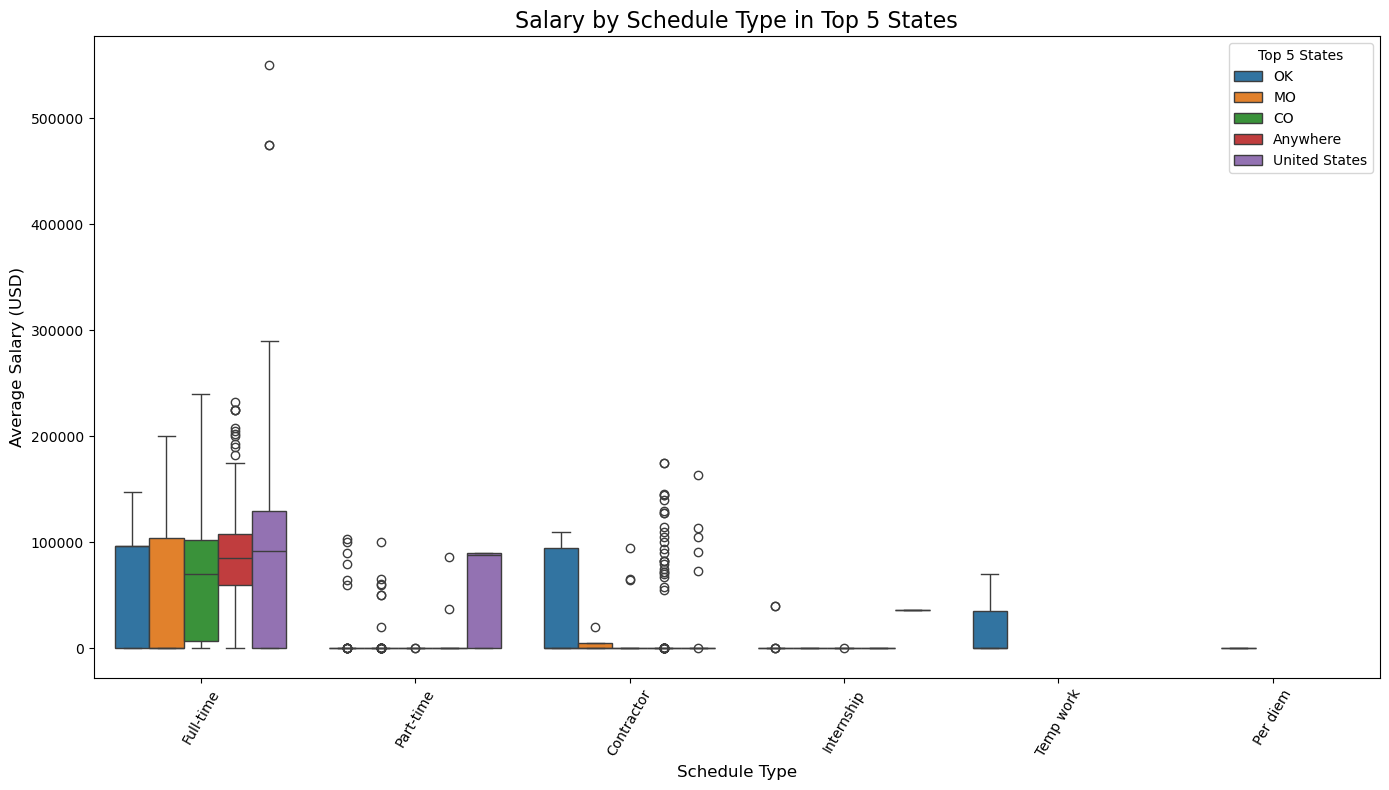

In [116]:
# 3A. Shows desc_wordcount across schedule type & state
all_types = ['Full-time', 'Part-time', 'Contractor', 'Internship', 'Temp work', 'Per diem', 'Volunteer']

# Melt df into long format and keep only rows where flag == 1
df_long = (
    df.melt(
        id_vars=['salary_avg', 'state_clean'],
        value_vars=all_types,
        var_name='schedule_type',
        value_name='flag'
    )
    .query("flag == 1") 
)

# Filter for top 5 most frequent states
top_states = df_long['state_clean'].value_counts().nlargest(5).index
df_long_filtered = df_long[df_long['state_clean'].isin(top_states)]


plt.figure(figsize=(14,8))
sns.boxplot(data=df_long_filtered, x='schedule_type', y='salary_avg', hue='state_clean')
plt.xticks(rotation=60, fontsize=10)
plt.title("Salary by Schedule Type in Top 5 States", fontsize=16)
plt.xlabel("Schedule Type", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.legend(title="Top 5 States")
plt.tight_layout()
plt.savefig("../images/salary_multi_3A.jpg")
plt.show()

- Full-time jobs are shown to dominate in volume and pay.
- "United States" (likely national listings without a specific state) includes some of the highest outliers, with one outlier pushing toward $550,000.
- Contractor roles, especially in OK and United States, span a large range, with some outliers above $150k. This means that some contractor positions can be lucrative, but the pay is not consistent.
- In MO, OK, and CO, the salaries do not vary as much, which could imply that job pay is more stable or follows local standards in those states.
- Next steps: 
    - Filter out extreme outliers
    - Add counts to show volume of postings per category to zoom-in on schedule types like "Per Diem" that may only have a few records.

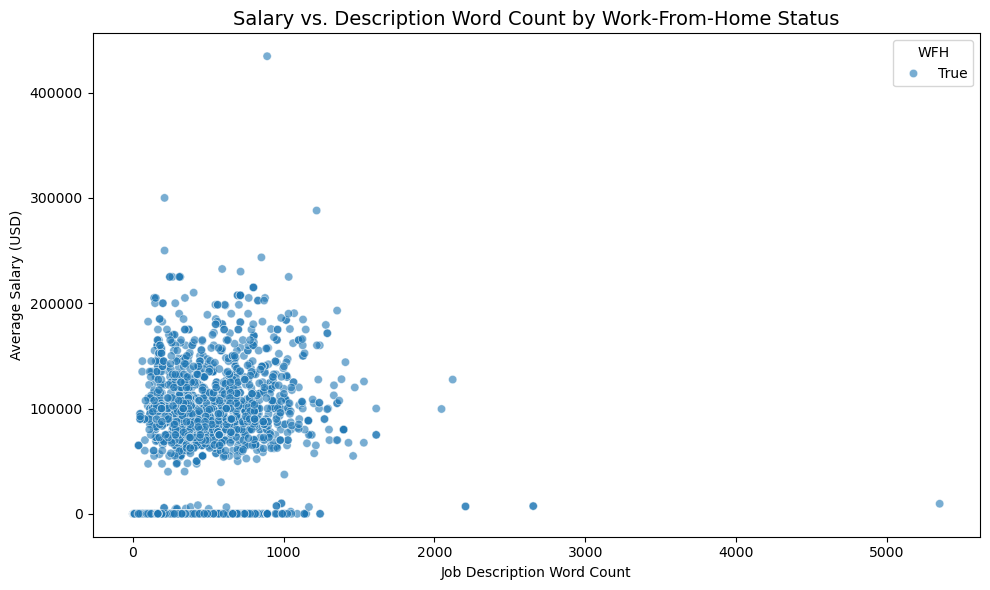

In [117]:
# 3B. Shows desc_wordcount across salary avg & work from home positions
plt.figure(figsize=(10,6))  # Optional: adjust size for better visibility

sns.scatterplot(
    data=df,
    x='desc_wordcount',
    y='salary_avg',
    hue='work_from_home',
    alpha=0.6  # makes overlapping points more readable
)

plt.title("Salary vs. Description Word Count by Work-From-Home Status", fontsize=14)
plt.xlabel("Job Description Word Count")
plt.ylabel("Average Salary (USD)")
plt.legend(title="WFH")
plt.tight_layout()
plt.savefig("../images/desc_wordcount_salary_wfh_3B.jpg")  # Added .jpg extension
plt.show()

This graph shows the word length and average pay of each job listing that offers the option to work from home. We can see that hourly positions offer the least amount of pay, but consist about the same number of words as salaried positions. It will be interesting to zoom-in on some of these outliers.